# Numerical integration and modelling using ODEs

As a simple warm-up, let us consider the following integral

$\int_0^{10} f(x)\, dx, \quad f(x)=x^2$

This is easily solvable analytically:

$ F(x) = \left[ \frac{1}{3}x^3 \right]^{10}_0 $ = 333.33

### Integration by Riemann summation

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Riemann_sum_convergence.png" width="400">

Four of the [Riemann summation](https://en.wikipedia.org/wiki/Riemann_sum) methods for approximating the area under curves. Right (blue) and left (yellow) methods make the approximation using the right and left endpoints of each subinterval, respectively. Maximum (green) and minimum (red) methods make the approximation using the largest and smallest endpoint values of each subinterval, respectively. The values of the sums converge as the subintervals halve from top-left to bottom-right.

The integral is then approximated by:

$$ S=\sum _{i=1}^{n}f(x_{i}^{*})\,\Delta x_{i}$$

Algorithm:

* write a module that defines parameters `N, x, a, b, c`, where `N` is the number of points to be calculated 
* write a function `x_squared` that reads in `x, a, b, c` and returns $f(x)=a*x^2+b*x+c$
* plot $f(x)$
* write a function that integrates the function using the Riemann sum



In [129]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

N = 1000 # number of datapoints
x_0 = 0.0
x_end = 10.0
a = 1.0
b = 0.0
c = 0.0

x_vec = np.linspace(x_0, x_end, N)

In [130]:
def x_squared(x_vec, a, b, c):
    '''takes in np vector x_vec
    calculates $f(x)ax^2+bx+c$'''
    
    f_x = a * (x_vec**2) + b * x_vec + c
    return f_x

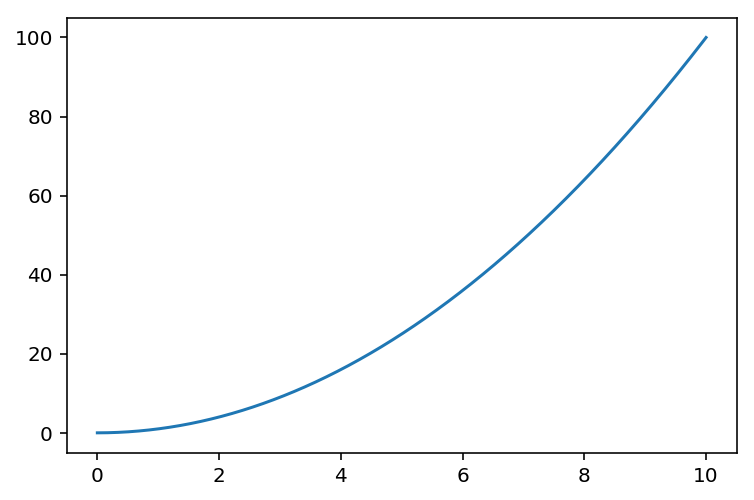

In [131]:
x_vec = np.linspace(x_0, x_end, N)
y_vec = x_squared(x_vec, a, b, c)

plt.plot(x_vec, y_vec)

In [132]:
def Riemannsum(x_vec, a, b, c, N):
    Rie_sum = 0
    dx = (x_vec[-1]-x_vec[0])/N
    for i in range(0, N):
        Rie_sum += x_squared(x_vec[i], a, b, c) * dx
    return Rie_sum

In [134]:
print(Riemannsum(x_vec, a, b, c, N))

333.5001668335001


**Exercise:**

Modify your integration algorithm, writing a further functions, using:

* the average of the left and right hand value of the function in each subinterval.

This algorithm makes use of the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). Comaprethis method with the previous one and explore which converges more quickly.

## Epidemic model

Let S, I and R, respectively, be the number of susceptible, infected and recovered individuals in a population. Based on simple assumptions, such as a constant population size and time-independent infection rate, the following set of equations can be derived:

$\large \frac{dS}{dt} = -\frac{\beta S I}{N}$

$\large \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I $

$\large \frac{dR}{dt} = \gamma I$

Let us initialise some of these parameters:

In [7]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 0.04
# A grid of time points (in days)
tvec = np.linspace(0, 100, 200)

We can now calculate the derivatives:

In [8]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

## Integrate these variables with Euler's method

In [9]:
t0 = tvec[0]
t1 = tvec[-1]
dt = tvec[1]-tvec[0]

S = S0
I = I0
R = R0

plotvec = []

for t in tvec:
    plotvec.append([S,I,R])    
    dSdt, dIdt, dRdt = deriv([S,I,R],t,N,beta,gamma)
    S += dSdt * dt
    I += dIdt * dt
    R += dRdt * dt

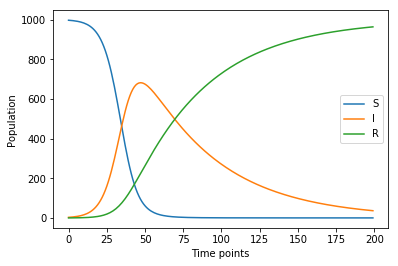

In [12]:
plt.plot(plotvec)
plt.legend(['S','I','R'])
plt.xlabel('Time points')
plt.ylabel('Population')
plt.show()

## Making a function

In [13]:
def Solve_SIR_Model(beta,gamma,tmax,N,I0,R0):
    S0 = N - I0 - R0
    tvec = np.linspace(0, tmax, 200)
    
    t0 = tvec[0]
    t1 = tvec[-1]
    dt = tvec[1]-tvec[0]

    S = S0
    I = I0
    R = R0

    plotvec = []

    for t in tvec:
        plotvec.append([S,I,R])    
        dSdt, dIdt, dRdt = deriv([S,I,R],t,N,beta,gamma)
        S += dSdt * dt
        I += dIdt * dt
        R += dRdt * dt    
        
    return tvec, plotvec

def Plot_SIR(beta,gamma,tmax,N=1000,I0=1,R0=0):
    tvec,plotvec = Solve_SIR_Model(beta,gamma,tmax,N,I0,R0)
    plt.plot(np.array([tvec,tvec,tvec]).T,plotvec)
    plt.legend(['S','I','R'])
    plt.xlabel('Time [days]')
    plt.ylabel('Population')    

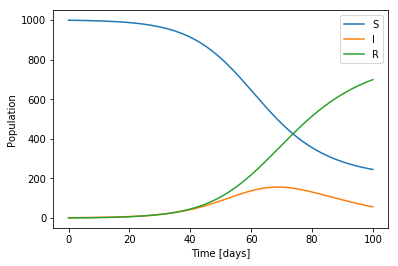

In [17]:
Plot_SIR(0.2,0.1,100)

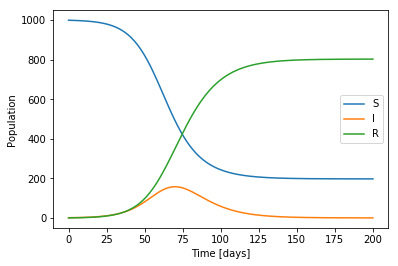

In [15]:
Plot_SIR(0.2,0.1,200)

# Fitting to real data

Pull up-to-date data from `http://data.europa.eu`

In [20]:
import numpy as np
import requests   #http: request call get: downloadsa any web page
import pandas as pd
import datetime
import os

today_string = datetime.date.today().strftime("%Y%m%d")
filename = 'data/data_%s.xlsx' % today_string

if not os.path.isfile(filename):
    # download data for today
    response = requests.get('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
    fid = open(filename,'wb')  #filehandler
    fid.write(response.content)
    fid.close()
    
data = pd.read_excel(filename)

In [19]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
3,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
5,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
6,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
8,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
9,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0


In [22]:
import numpy as np
import requests   #http: request call get: downloadsa any web page
import pandas as pd
import datetime
import os

today_string = datetime.date.today().strftime("%Y%m%d")
filename = 'data_%s.xlsx' % today_string

if not os.path.isfile(filename):
    # download data for today
    response = requests.get('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
    fid = open(filename,'wb')
    fid.write(response.content)
    fid.close()
    
data = pd.read_excel(filename)

Get the UK specific data:

In [23]:
UK_indices = data['countriesAndTerritories'] == 'United_Kingdom'
data[UK_indices]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7916,2020-04-02,2,4,2020,4324,743,United_Kingdom,UK,GBR,66488991.0
7917,2020-04-01,1,4,2020,3009,381,United_Kingdom,UK,GBR,66488991.0
7918,2020-03-31,31,3,2020,2619,180,United_Kingdom,UK,GBR,66488991.0
7919,2020-03-30,30,3,2020,2433,209,United_Kingdom,UK,GBR,66488991.0
7920,2020-03-29,29,3,2020,2546,260,United_Kingdom,UK,GBR,66488991.0
7921,2020-03-28,28,3,2020,2885,181,United_Kingdom,UK,GBR,66488991.0
7922,2020-03-27,27,3,2020,2129,115,United_Kingdom,UK,GBR,66488991.0
7923,2020-03-26,26,3,2020,1452,41,United_Kingdom,UK,GBR,66488991.0
7924,2020-03-25,25,3,2020,1427,87,United_Kingdom,UK,GBR,66488991.0
7925,2020-03-24,24,3,2020,967,54,United_Kingdom,UK,GBR,66488991.0


How does the data look?

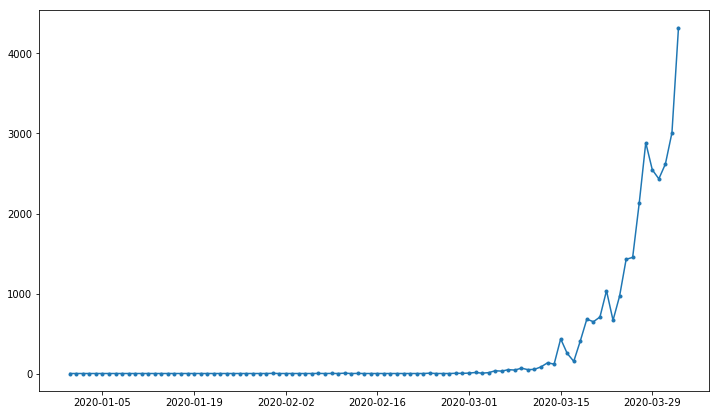

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters 
import seaborn
register_matplotlib_converters() # needed for datetime

plt.figure(figsize=(12,7))

UK_data = data[UK_indices]
plt.plot(UK_data['dateRep'], UK_data['cases'],'.-')  #orders correctly, note that is not index

Inspect the top rows of the dataframe:

In [28]:
UK_data[['cases']].head()

,cases
7916,4324
7917,3009
7918,2619
7919,2433
7920,2546


Invert the order of this list:

In [29]:
UK_data_srt = UK_data['cases'][::-1]
UK_data_srt.head()

8009    0
8008    0
8007    0
8006    0
8005    0
Name: cases, dtype: int64

In [30]:
UK_data_srt.tail()

7920    2546
7919    2433
7918    2619
7917    3009
7916    4324
Name: cases, dtype: int64

In [31]:
UK_data_srt.cumsum().tail()  #cumulative sum of data

7920    17089
7919    19522
7918    22141
7917    25150
7916    29474
Name: cases, dtype: int64

In [32]:
# filter non-zero data
UK_data_srt_nonzero = UK_data_srt[UK_data_srt.cumsum() > 0]
UK_data_srt_nonzero

7978       2
7977       0
7976       0
7975       0
7974       0
7973       0
7972       0
7971       1
7970       0
7969       1
7968       0
7967       4
7966       0
7965       1
7964       0
7963       0
7962       0
7961       0
7960       0
7959       0
7958       0
7957       0
7956       0
7955       0
7954       4
7953       0
7952       0
7951       0
7950       3
7949       2
        ... 
7945      11
7944      34
7943      30
7942      48
7941      43
7940      67
7939      48
7938      52
7937      83
7936     134
7935     117
7934     433
7933     251
7932     152
7931     407
7930     680
7929     647
7928     706
7927    1035
7926     665
7925     967
7924    1427
7923    1452
7922    2129
7921    2885
7920    2546
7919    2433
7918    2619
7917    3009
7916    4324
Name: cases, Length: 63, dtype: int64

In [41]:
pd.__version__

'0.23.0'

In [40]:
!pip install pandas

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
cumsum_cases = UK_data_srt_nonzero.to_numpy()
tvec = np.array(range(len(cumsum_cases)))

'cumsum_cases:',cumsum_cases,'tvec:',tvec

AttributeError: 'Series' object has no attribute 'to_numpy'

### Fitting and plotting

In [25]:
# Define function like before but modified

def Plot_I(beta,gamma,tmax,N=1000,I0=1,R0=0):
    tvec,plotvec = Solve_SIR_Model(beta,gamma,tmax,N,I0,R0)
    I_pred = np.array(plotvec)[:,1] # get I column
    plt.plot(tvec,I_pred)
    plt.xlabel('Time [days]')
    plt.ylabel('Population') 

Let's test the function:

In [26]:
Plot_I(0.2,0.04,tvec[-1],N=60e9,I0=cumsum_cases[0])

NameError: name 'cumsum_cases' is not defined

Can we find a set of values that fit the data?

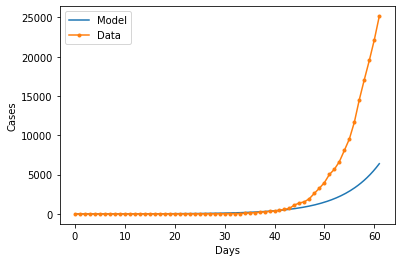

In [104]:
Plot_I(0.15,0.015,tvec[-1],N=60e9,I0=cumsum_cases[0])
plt.plot(tvec,cumsum_cases,'.-')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend(['Model','Data'])

Nope! Try other values.

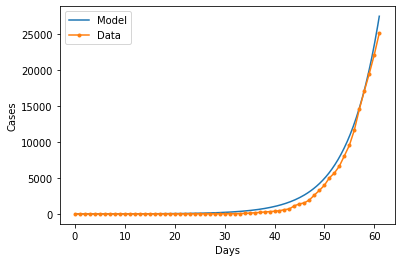

In [117]:
Plot_I(0.2,0.04,tvec[-1],N=60e9,I0=cumsum_cases[0])
plt.plot(tvec,cumsum_cases,'.-')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend(['Model','Data'])

Agreement is decent, but actually we have many local optima - these parameters are completely different:

Text(0, 0.5, 'Cases')

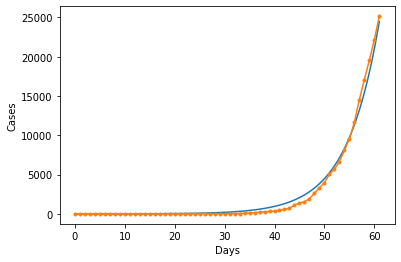

In [124]:
Plot_I(0.42,0.262,tvec[-1],N=60e9,I0=cumsum_cases[0])
plt.plot(tvec,cumsum_cases,'.-')
plt.xlabel('Days')
plt.ylabel('Cases')

We need to consider more data, i.e. the number of recovered, to uniquely fit the parameters.

However, knowing that our predictions are rather uncertain due to this, can we get an idea of when the peak of the number of infected occors? 

Let us plot the predictions for the two above parameters sets over an extended period:

#### Case 1

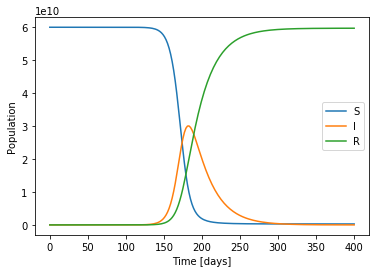

In [107]:
Plot_SIR(0.2,0.04,400,N=60e9,I0=cumsum_cases[0])

#### Case 2

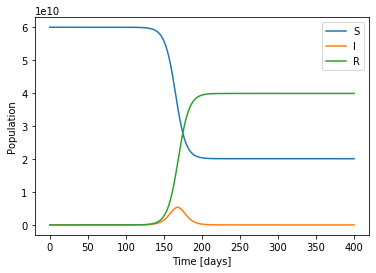

In [125]:
Plot_SIR(0.42,0.262,400,N=60e9,I0=cumsum_cases[0])

In both cases the peak occurs after more than **150 days** and less than **200 days**.

**Some more problems to try:**
- Include data on the number of recovered individuals to make the fitting problem well-posed
- Perform the fitting using a numerical optimisation method (scipy's fmin for instance, akin to fminsearch in Matlab) to determine beta and gamma; requires a well-posed problem to work properly
- Consider what happens to predictions if 'dark figures' (unreported cases) are added to the data; e.g. if the observed numbers are instead doubled, what does the fit say?

#### Optional: requires ipywidgets interact

In [108]:
# from __future__ import print_function
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# @interact(beta=(0.1,0.5,0.001), gamma=(0.1,0.5,0.001))
# def g(beta,gamma):
#     Plot_I(beta,gamma,tvec[-1],N=60e9,I0=cumsum_cases[0])
#     plt.plot(tvec,cumsum_cases,'.-')
#     plt.xlabel('Days')
#     plt.ylabel('Cases')

interactive(children=(FloatSlider(value=0.30000000000000004, description='beta', max=0.5, min=0.1, step=0.001)…

## Endnote

We could also have used a built-in method for solving the ODE 

In [153]:
from scipy.integrate import odeint

# Initial conditions vector
y0 = [S0, I0, R0]
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, tvec, args=(N, beta, gamma))
S, I, R = ret.T

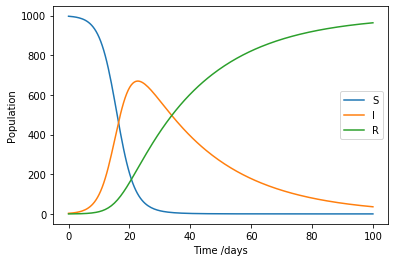

In [154]:
plt.plot(tvec, S)
plt.plot(tvec, I)
plt.plot(tvec, R)
plt.xlabel('Time /days')
plt.ylabel('Population')
plt.legend(['S','I','R'])

##### Finding the beta and gamma parameters by optimisation

One could use an optimisation method to minimise the deviation between or model prediction and the data.

This is unlikely to work well, since we have an ill-posed problem (solutions are not unique), but the below library would be useful:

`from scipy.optimize import minimize`